In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

Default = pd.read_excel('~/Desktop/ISLR_Data/Default.xlsx')

In [27]:
Default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [28]:
Default.describe(include='all')

,Unnamed: 0,default,student,balance,income
count,10000.00000,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7056,NaN,NaN
mean,5000.50000,NaN,NaN,835.374886,33516.981876
std,2886.89568,NaN,NaN,483.714985,13336.639563
min,1.00000,NaN,NaN,0.000000,771.967729
25%,2500.75000,NaN,NaN,481.731105,21340.462903
50%,5000.50000,NaN,NaN,823.636973,34552.644802
75%,7500.25000,NaN,NaN,1166.308386,43807.729272


In [29]:
Default.balance.groupby(by=Default['default']).mean()

default
No      803.94375
Yes    1747.82169
Name: balance, dtype: float64

In [30]:
Default.income.groupby(by=Default['default']).mean()

default
No     33566.166625
Yes    32089.147124
Name: income, dtype: float64

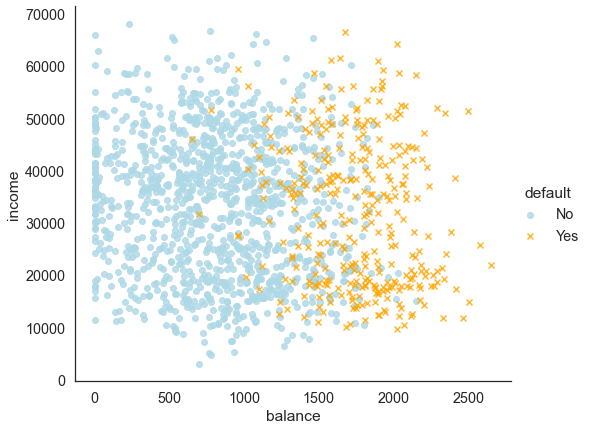

In [31]:
some_of_No = pd.concat([Default.loc[Default.default == 'No', :].sample(n=1200),
                       Default.loc[Default.default == 'Yes', :] ], axis=0)

sns.set(style='white', font_scale=1.3)
def_palette = {'No':'lightblue', 'Yes':'orange'}

sns.lmplot('balance', 'income', data=some_of_No, hue='default', fit_reg=False,
          markers=['o', 'x'], height=6, aspect=1.2, palette=def_palette)

<AxesSubplot:xlabel='default', ylabel='income'>

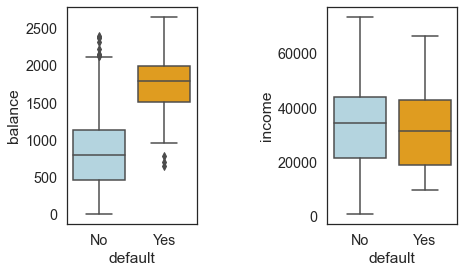

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
fig.subplots_adjust(wspace=1)
sns.boxplot('default', 'balance', data=Default, orient='v', ax=ax1, palette=def_palette)
sns.boxplot('default', 'income', data=Default, orient='v', ax=ax2, palette=def_palette)

In [33]:
pd.get_dummies(Default).head()

,Unnamed: 0,balance,income,default_No,default_Yes,student_No,student_Yes
0,1,729.526495,44361.625074,1,0,1,0
1,2,817.180407,12106.134700,1,0,0,1
2,3,1073.549164,31767.138947,1,0,1,0
3,4,529.250605,35704.493935,1,0,1,0
4,5,785.655883,38463.495879,1,0,1,0


In [34]:
Default_enc = pd.get_dummies(Default, drop_first=True)
Default_enc.head()

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,0,1
2,3,1073.549164,31767.138947,0,0
3,4,529.250605,35704.493935,0,0
4,5,785.655883,38463.495879,0,0


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logistic_reg = LogisticRegression(solver='newton-cg')

X = Default_enc.balance.values.reshape(-1, 1)
Y = Default_enc.default_Yes

In [37]:
logistic_reg.fit(X, Y)

LogisticRegression(solver='newton-cg')

In [38]:
print('classes: ', logistic_reg.classes_)
print('intercept : ', logistic_reg.intercept_)
print('coefficient: ', logistic_reg.coef_)

classes:  [0 1]
intercept :  [-10.65133001]
coefficient:  [[0.00549892]]


In [39]:
X_new = np.array([1000, 2000, 1700]).reshape(-1, 1)
logistic_reg.predict_proba(X_new)

array([[0.99424785, 0.00575215],
       [0.41423066, 0.58576934],
       [0.78636832, 0.21363168]])

In [40]:
logistic_reg.predict(X_new)

array([0, 1, 0], dtype=uint8)

In [41]:
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('seaborn-white')

In [42]:
Default['default2'] = Default.default.factorize()[0]
Default['student2'] = Default.student.factorize()[0]
Default.head(3)

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0


In [46]:
X = Default[['balance', 'income', 'student2']].to_numpy()
y = Default.default2.to_numpy()

lda = LinearDiscriminantAnalysis(solver='svd')
y_pred = lda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9645,254
Yes,22,79


In [48]:
X = Default[['balance', 'income', 'student2']].to_numpy()
y = Default.default2.to_numpy()

qda = QuadraticDiscriminantAnalysis()
y_pred = qda.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9636,239
Yes,31,94


In [52]:
X = Default[['balance', 'income', 'student2']].to_numpy()
y = Default.default2.to_numpy()

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
y_pred = knn.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9658,292
Yes,9,41


In [53]:
X = Default[['balance', 'income', 'student2']].to_numpy()
y = Default.default2.to_numpy()

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
y_pred = knn.fit(X, y).predict(X)

df_ = pd.DataFrame({'True default status': y,
                    'Predicted default status': y_pred})
df_.replace(to_replace={0:'No', 1:'Yes'}, inplace=True)

df_.groupby(['Predicted default status','True default status']).size().unstack('True default status')

True default status,No,Yes
Predicted default status,,
No,9667.0,NaN
Yes,NaN,333.0
